In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('clean data/visualize_data.csv')
df.head(10)

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,direction,street_in_front_of_house,width,city,district
0,4.45,64.0,4.0,4.0,True,True,True,True,Nhà mặt tiền,None,7.0,4.000000,Hồ Chí Minh,Nội thành
1,5.60,64.0,4.0,4.0,True,True,True,True,Nhà mặt tiền,None,12.0,4.500000,Hồ Chí Minh,Ngoại thành
2,1.50,31.0,3.0,3.0,False,False,False,False,Nhà mặt tiền,Đông Nam,3.0,4.000000,Hà Nội,Ngoại thành
3,1.12,30.0,3.0,3.0,False,False,False,False,Nhà trong hẻm,Đông Nam,3.0,4.000000,Hà Nội,Ngoại thành
4,10.28,68.0,4.0,5.0,False,False,False,False,Nhà trong hẻm,None,8.0,4.447258,Hồ Chí Minh,Nội thành
5,1.69,44.0,3.0,2.0,False,False,False,False,Nhà trong hẻm,Tây Bắc,2.5,3.000000,Hà Nội,Ngoại thành
6,5.00,45.0,5.0,5.0,True,True,True,False,Nhà mặt tiền,None,3.0,4.500000,Hà Nội,Nội thành
7,2.50,35.0,5.0,3.0,True,True,True,False,Nhà trong hẻm,None,3.0,4.447258,Hà Nội,Ngoại thành
8,4.80,60.0,4.0,4.0,True,True,True,True,Nhà mặt tiền,Nam,12.0,4.000000,Hồ Chí Minh,Ngoại thành
9,3.95,95.0,2.0,4.0,True,True,True,True,Nhà mặt tiền,None,8.0,5.000000,Hồ Chí Minh,Nội thành


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39160 entries, 0 to 39159
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     39160 non-null  float64
 1   area                      39160 non-null  float64
 2   floor_number              39160 non-null  float64
 3   bedroom_number            39160 non-null  float64
 4   is_dinning_room           39160 non-null  bool   
 5   is_kitchen                39160 non-null  bool   
 6   is_terrace                39160 non-null  bool   
 7   is_car_pack               39160 non-null  bool   
 8   type                      39160 non-null  object 
 9   direction                 39160 non-null  object 
 10  street_in_front_of_house  39160 non-null  float64
 11  width                     39160 non-null  float64
 12  city                      39160 non-null  object 
 13  district                  39160 non-null  object 
dtypes: boo

In [4]:
features = df.drop(columns=['price', 'area', 'street_in_front_of_house', 'width'])
total_features = features.columns.to_list()
total_features

['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']

In [5]:
feature_unique_fields = {}
for i in total_features:
    feature_unique_fields[i] = features[i].unique().tolist()

len_features = len(feature_unique_fields)
for i in range(len_features):
    list(feature_unique_fields.values())[i].sort()
feature_unique_value = {}
for feature in total_features:
    # print("Feature: \n", feature)
    feature_len = len(feature_unique_fields[feature])
    # print("Len: ", feature_len)
    feature_value = feature_unique_fields[feature]
    # print(feature_value)
    feature_unique_value[feature] = [sum(df[df[feature] == feature_value[i]].price) / df[feature].value_counts()[feature_value[i]] for i in range(feature_len)]
    
# print(feature_unique_value)
feature_unique_fields


{'floor_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
 'bedroom_number': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
 'is_dinning_room': [False, True],
 'is_kitchen': [False, True],
 'is_terrace': [False, True],
 'is_car_pack': [False, True],
 'type': ['Nhà mặt tiền', 'Nhà trong hẻm'],
 'direction': ['Bắc',
  'Nam',
  'None',
  'Tây',
  'Tây Bắc',
  'Tây Nam',
  'Đông',
  'Đông Bắc',
  'Đông Nam'],
 'city': ['Hà Nội', 'Hồ Chí Minh'],
 'district': ['Ngoại thành', 'Nội thành']}

In [6]:
visualized_features = total_features
name_of_features = ['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']
labels = ['Số tầng', 'Số phòng ngủ', 'Có phòng ăn hay không', 'Có phòng bếp hay không', 'Có sân thượng hay không', 
'Có chỗ để xe hay không','Loại bất động sản' , 'Hướng bất động sản','Thành phố', 'Quận/Huyện']
titles = ['Biểu đồ thể hiện giá nhà trung bình theo số tầng nhà','Biểu đồ giá nhà trung bình theo số phòng ngủ', 'Biểu đồ giá nhà trung bình theo phòng ăn', 
'Biểu đồ giá nhà trung bình có và không có bếp', 'Giá nhà trung bình với sân thượng', 'Giá nhà trung bình với chỗ để xe', 
'Biểu đồ thể hiện giá nhà trung bình theo loại bất động sản', 'Biểu đồ thể hiện giá nhà trung bình theo hướng bất động sản', 
'Biểu đồ thể hiện giá nhà trung bình theo thành phố', 'Biểu đồ thể hiện giá nhà trung bình theo quận/huyện bất động sản']

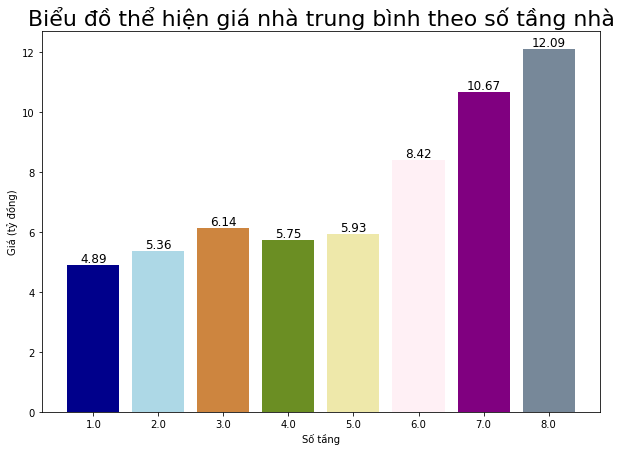

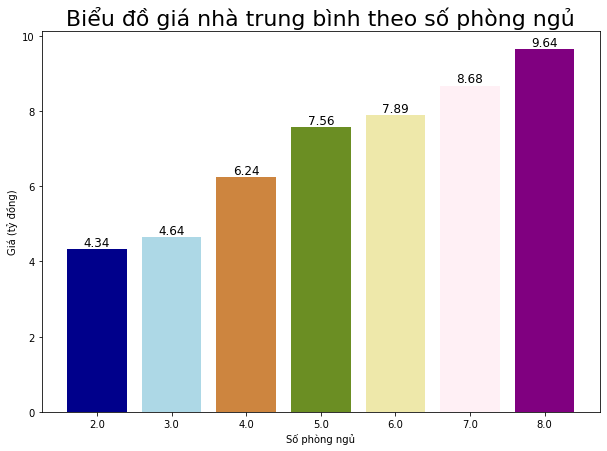

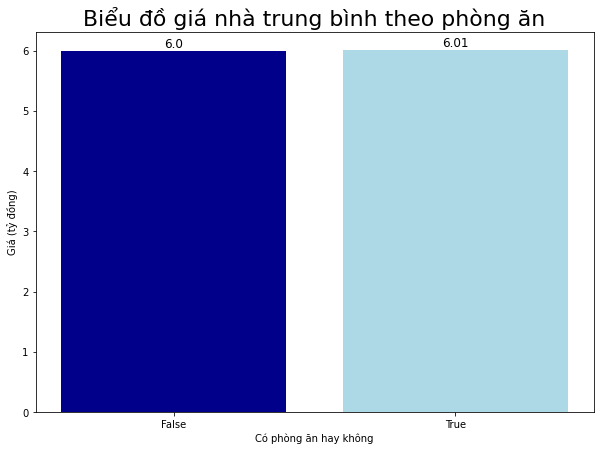

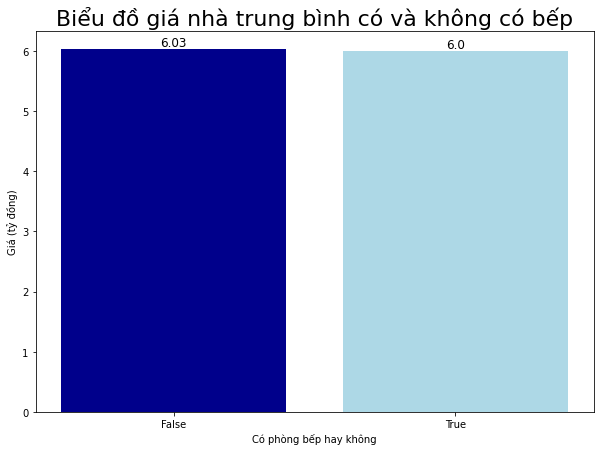

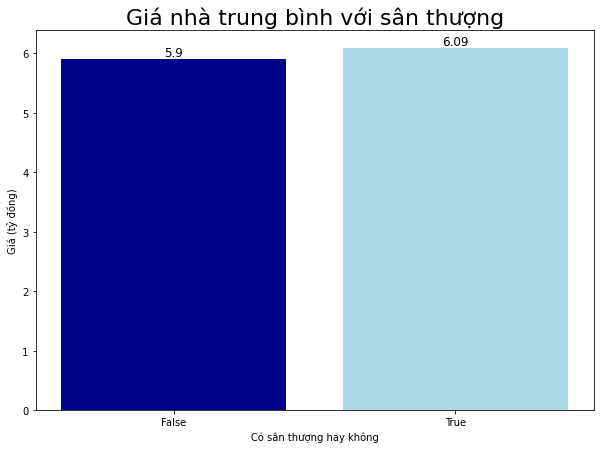

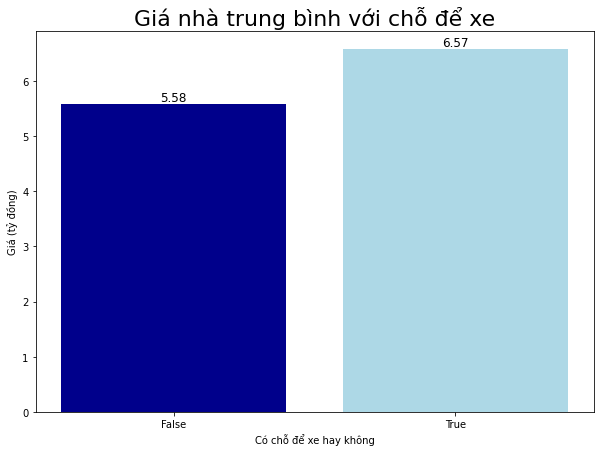

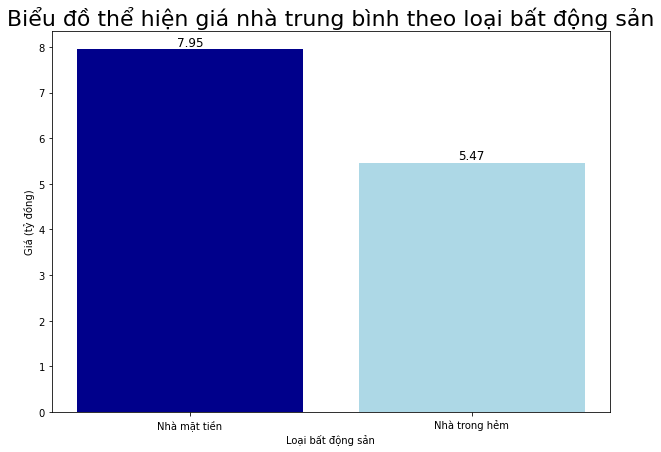

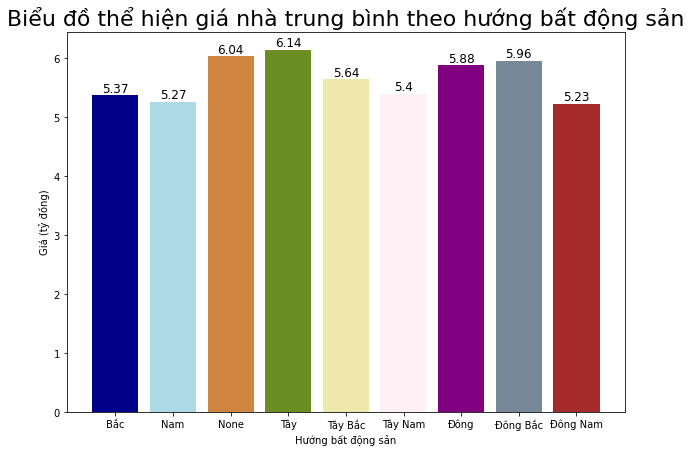

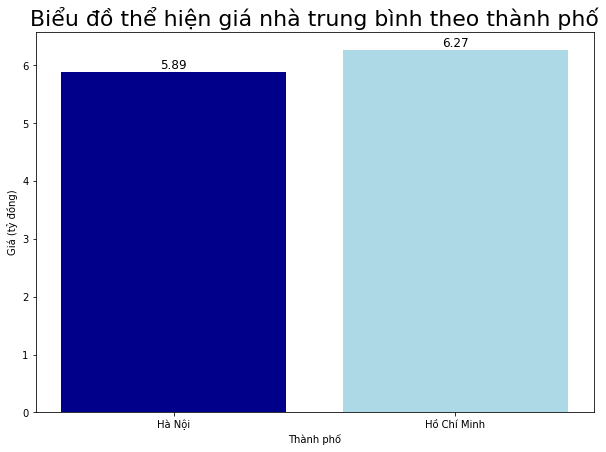

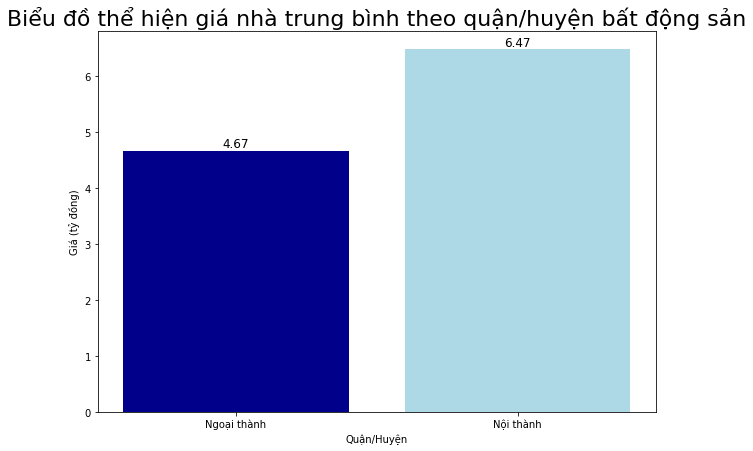

In [7]:
import random
count = 0
for feature in visualized_features:
    N = len(feature_unique_value[feature])
    ind = np.arange(N) 
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=N) 
    text_value = {}
    for i in ind:
        # print(feature_unique_value[feature][i])
        text_value[i] = feature_unique_value[feature][i]
    # width = 0.5
    # print(text_value)
    fig = plt.subplots(figsize =(10, 7))
    plt.bar(ind, feature_unique_value[feature], color = c)
    for key in text_value:
        plt.text(key, text_value[key], float(round(text_value[key], 2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    plt.xticks(ind, list( feature_unique_fields[feature]))
    plt.xlabel(labels[count])
    plt.ylabel("Giá (tỷ đồng)")
    plt.title(titles[count], fontsize = 22)
    count += 1
plt.show()